In [81]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
import seaborn as sns; sns.set_theme(color_codes=True)
import os
import matplotlib.pyplot as plt
import matplotlib
import sklearn.cluster
import sklearn.metrics
import sklearn.datasets
import warnings
import random
warnings.filterwarnings("ignore")

In [43]:
import dask.dataframe as dd

In [84]:
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [85]:
sns.set_style(style='white')

In [54]:
functional_snps = pd.read_csv("Carter Lab Datasets/functional_meqtls_overlap2.txt", delimiter = "\t", header = None)
functional_snps

,0,1,2,3,4,5
0,2,10572,A,C,0.187316,5.650
1,2,18674,C,A,-0.310182,0.341
2,2,26844,C,T,-0.348046,0.262
3,2,27572,C,T,-0.266129,0.461
4,2,29068,C,G,-0.210520,0.670
...,...,...,...,...,...,...
1218426,15,102397372,T,C,0.117749,4.555
1218427,15,102397824,G,A,0.033289,3.148
1218428,15,102397836,C,T,0.059482,3.583
1218429,15,102399133,C,G,-0.060888,1.812


In [49]:
print(functional_snps[(functional_snps[1] == 3395262)])

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5]
Index: []


In [8]:
print(pd.unique(functional_snps[0]))

[ 2  5 17  7  4 16 10 20  8 18  9 11  6  3 19 12  1 21 22 13 14 15]


In [3]:
meqtls = pd.read_csv("Carter Lab Datasets/meQTL Data/unique_meqtls.csv")
meqtls

,Unnamed: 0,Unnamed: 0.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp
0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621
1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560
2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186
3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709
4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711371
1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711386
1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2018353
1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2019373


In [58]:
meqtl_dict["chr15:102397372"]

True

In [17]:
meqtl_dict = {}
for i, row in meqtls.iterrows():
    if i % 100000 == 0:
        print(i)
    meqtl_dict[row["snp_position"]] = True

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


In [22]:
print(len(meqtl_dict))

1236096


In [5]:
common_TADs = pd.read_csv("Carter Lab Datasets/common_TADs_meQTLs.csv")
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K27me3,H4K20me1,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.167622,0.705304,206,4,71,141,950000,0.062006,0.021654,0.047834
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.226065,0.369001,219,4,122,97,825000,0.075906,0.042846,0.037893
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.275085,0.000000,283,4,90,194,340000,0.238009,0.076695,0.183891
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.244738,0.000000,301,4,201,189,655000,0.131405,0.088911,0.092995
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.499037,0.704529,38,0,26,22,205000,0.053005,0.036747,0.034587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.000000,0.000000,0,0,0,0,205000,0.000000,0.000000,0.000000
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,1.000000,0.000000,0,1,0,0,250000,0.000000,0.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.000000,1.000000,0,1,0,0,235000,0.000000,0.000000,0.000000
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.000000,0.000000,0,1,0,0,155000,0.000000,0.000000,0.000000


In [26]:
boundary_regions = pd.read_csv("Carter Lab Datasets/boundary_regions.csv")
boundary_regions

,Unnamed: 0,chr1,x1,x2
0,0,1,7710000,7715000
1,1,1,8010000,8030000
2,2,1,8410000,9170000
3,3,1,9295000,9330000
4,4,1,9550000,11075000
...,...,...,...,...
1072,1072,X,108880000,108950000
1073,1073,X,109125000,109150000
1074,1074,X,109385000,117750000
1075,1075,X,117955000,133635000


In [14]:
tad_test = []
for i, row in common_TADs.iterrows():
    st = str(row["chr1"])+ ":" + str(row["x1"]) + "-" + str(row["x2"])
    tad_test.append(st)
tad_test

['1:36960000-37910000',
 '1:38485000-39310000',
 '1:157140000-157480000',
 '1:64075000-64730000',
 '1:110325000-110530000',
 '1:227940000-228150000',
 '1:228790000-229365000',
 '1:180845000-181140000',
 '1:93305000-93470000',
 '1:150520000-150970000',
 '1:7715000-8010000',
 '1:21555000-21700000',
 '1:112000000-112315000',
 '1:90260000-90465000',
 '1:214525000-214780000',
 '1:39320000-39545000',
 '1:172415000-172700000',
 '1:53930000-54220000',
 '1:182880000-183220000',
 '1:229385000-229630000',
 '1:222910000-223275000',
 '1:198475000-198665000',
 '1:62625000-62885000',
 '1:15450000-15610000',
 '1:26365000-26775000',
 '1:116670000-117045000',
 '1:7295000-7710000',
 '1:40535000-40900000',
 '1:169520000-169780000',
 '1:115695000-116115000',
 '1:11360000-11705000',
 '1:48555000-48700000',
 '1:161155000-161360000',
 '1:92435000-92720000',
 '1:161750000-162015000',
 '1:200525000-200810000',
 '1:82010000-82235000',
 '1:180220000-180460000',
 '1:246650000-246925000',
 '1:66710000-66915000',
 '

In [15]:
print(len(set(tad_test)))

1100


In [70]:
good_meqtls = []
for i, row in functional_snps.iterrows():
    if i % 100000 == 0:
        print(i)
    try:
        st = "chr"+str(row[0])+":"+str(row[1])
        if meqtl_dict[st]:
            good_meqtls.append([int(row[0]), int(row[1]), float(row[5])])
    except:
        continue
good_meqtls

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


[[2, 10572, 5.65],
 [2, 18674, 0.341],
 [2, 26844, 0.262],
 [2, 27572, 0.461],
 [2, 29068, 0.67],
 [2, 29970, 7.042000000000001],
 [2, 30091, 0.16699999999999998],
 [2, 30091, 0.253],
 [2, 30906, 0.267],
 [2, 30940, 5.818],
 [2, 31261, 0.078],
 [2, 31318, 0.005],
 [2, 31318, 0.003],
 [2, 31324, 0.773],
 [2, 31791, 1.62],
 [2, 34049, 4.93],
 [2, 36787, 1.682],
 [2, 37923, 0.358],
 [2, 38202, 1.23],
 [2, 38219, 3.534],
 [2, 39340, 4.257],
 [2, 39980, 4.438],
 [2, 40569, 0.514],
 [2, 43092, 3.373],
 [2, 47011, 6.582000000000001],
 [2, 47648, 2.932],
 [2, 47808, 0.05],
 [2, 50092, 1.685],
 [2, 51141, 2.157],
 [2, 53652, 0.757],
 [2, 53820, 6.045],
 [2, 55237, 1.839],
 [2, 56538, 3.8960000000000004],
 [2, 56916, 4.175],
 [2, 56916, 3.174],
 [2, 57623, 0.185],
 [2, 59698, 0.638],
 [2, 59997, 1.8659999999999999],
 [2, 60779, 1.202],
 [2, 61496, 1.4580000000000002],
 [2, 61496, 1.621],
 [2, 61687, 8.097000000000001],
 [2, 62232, 1.2209999999999999],
 [2, 63452, 2.844],
 [2, 64201, 9.758],
 [2,

In [60]:
print(len(good_meqtls))

1218431


In [78]:
active_scores = []
inactive_scores = []
mixed_scores = []
for i in range(len(good_meqtls)):
    if i % 100000 == 0:
        print(i)
    overlap_chr = common_TADs[common_TADs["chr1"] == str(good_meqtls[i][0])]
    overlap_snp = overlap_chr[(overlap_chr["x1"] <= good_meqtls[i][1]) & (good_meqtls[i][1] <= overlap_chr["x2"])]
    if len(overlap_snp)>0:
        if overlap_snp.iloc[0]["KMeans_State_Labels"] == 0:
            mixed_scores.append(good_meqtls[i][2])
        elif overlap_snp.iloc[0]["KMeans_State_Labels"] == 1 and overlap_snp.iloc[0]["KMeans_State_Labels"] == 4:
            inactive_scores.append(good_meqtls[i][2])
        else:
            active_scores.append(good_meqtls[i][2])



0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


In [79]:
boundary_scores = []
for i in range(len(good_meqtls)):
    if i % 100000 == 0:
        print(i)
    overlap_chr2 = boundary_regions[boundary_regions["chr1"] == str(good_meqtls[i][0])]
    overlap_snp2 = overlap_chr2[(overlap_chr2["x1"] <= good_meqtls[i][1]) & (good_meqtls[i][1] <= overlap_chr2["x2"])]
    if len(overlap_snp2)>0:
        boundary_scores.append(good_meqtls[i][2])
        

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


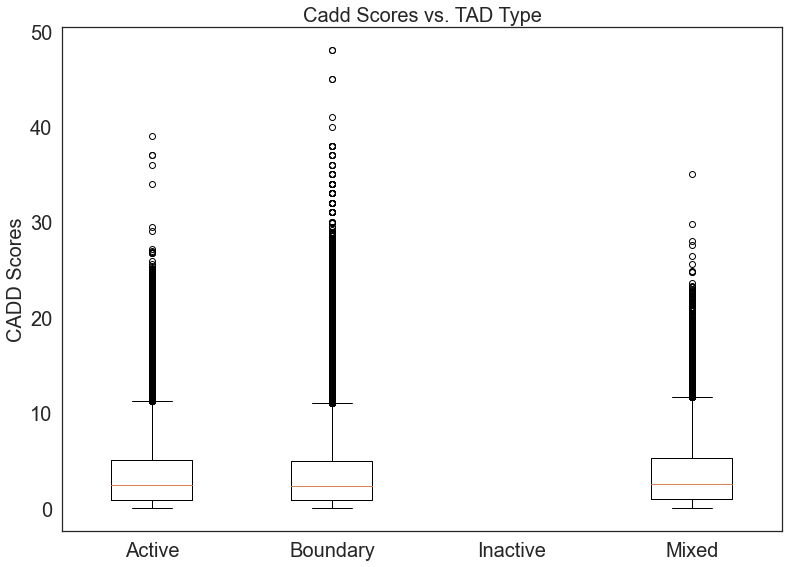

In [97]:
data = [active_scores, boundary_scores, inactive_scores, mixed_scores]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
boxplt = ax.boxplot(data)
plt.ylabel("CADD Scores", fontsize=20)
plt.title("Cadd Scores vs. TAD Type", fontsize=20)
ax.set_xticklabels(["Active", "Boundary", "Inactive", "Mixed"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()